In [225]:
from sklearn.neural_network import MLPClassifier  
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [13]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
train


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


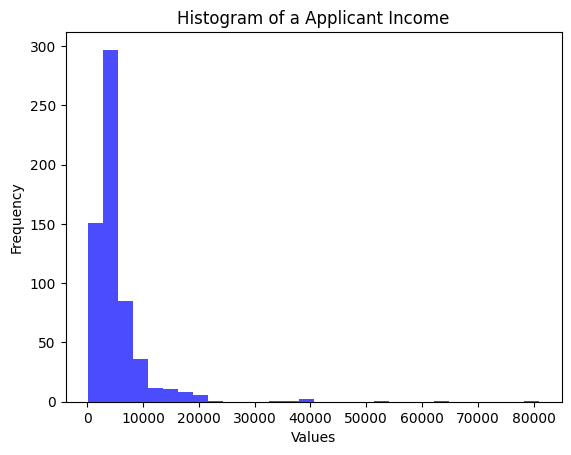

In [14]:
train_ApplicantIncome = train['ApplicantIncome']

# Create a histogram
plt.hist(train_ApplicantIncome, bins=30, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of a Applicant Income')

# Show the plot
plt.show()

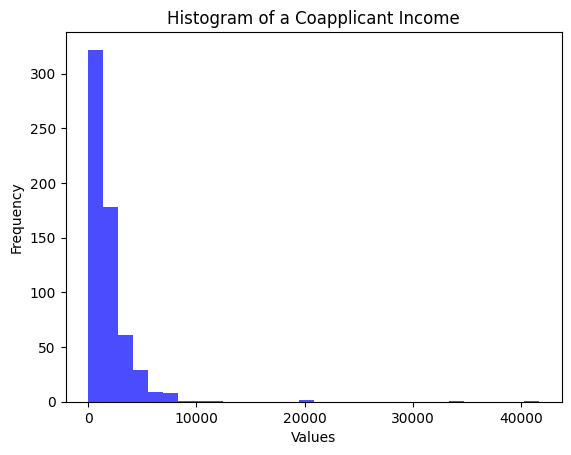

In [6]:
train_CoapplicantIncome = train['CoapplicantIncome']

# Create a histogram
plt.hist(train_CoapplicantIncome, bins=30, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of a Coapplicant Income')

# Show the plot
plt.show()

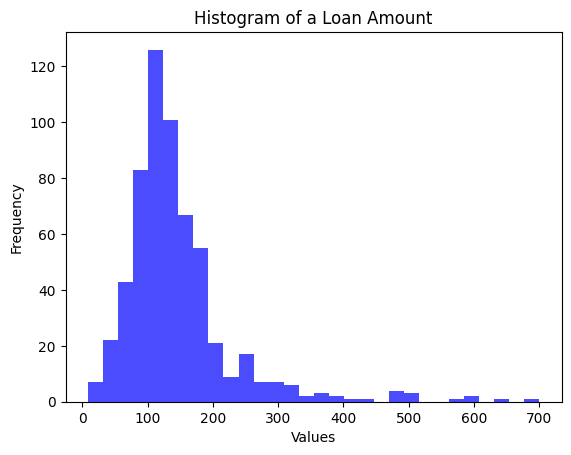

In [7]:
train_LoanAmount = train['LoanAmount']

# Create a histogram
plt.hist(train_LoanAmount, bins=30, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of a Loan Amount')

# Show the plot
plt.show()

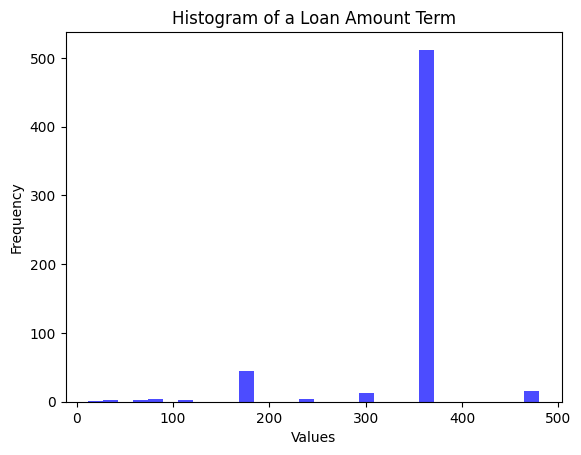

In [8]:
train_Loan_Amount_Term = train['Loan_Amount_Term']

# Create a histogram
plt.hist(train_Loan_Amount_Term, bins=30, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of a Loan Amount Term')

# Show the plot
plt.show()

<Axes: xlabel='Gender'>

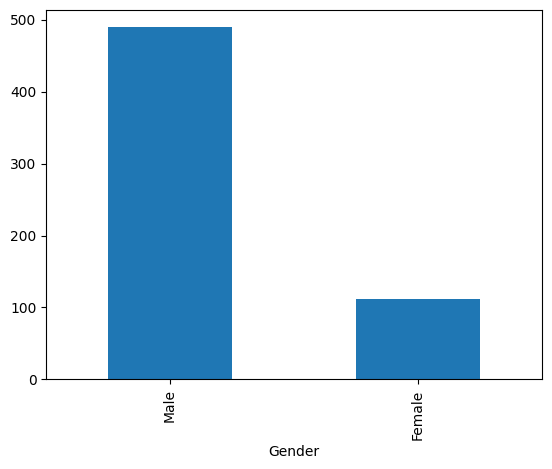

In [9]:
train['Gender'].value_counts().plot(kind='bar')

<Axes: xlabel='Married'>

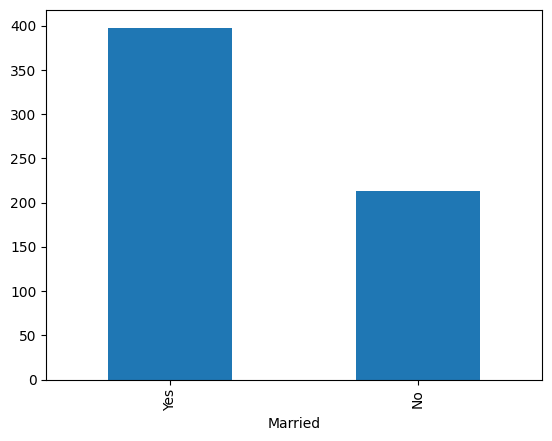

In [10]:
train['Married'].value_counts().plot(kind='bar')

<Axes: xlabel='Dependents'>

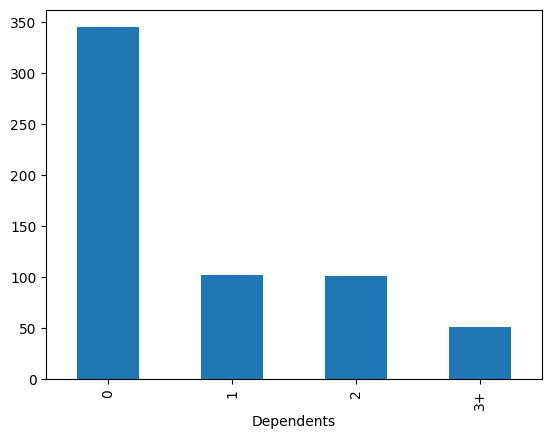

In [11]:
train['Dependents'].value_counts().plot(kind='bar')

<Axes: xlabel='Education'>

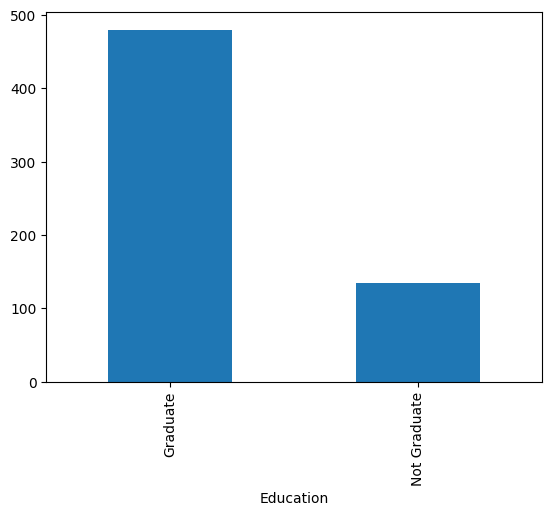

In [12]:
train['Education'].value_counts().plot(kind='bar')

<Axes: xlabel='Self_Employed'>

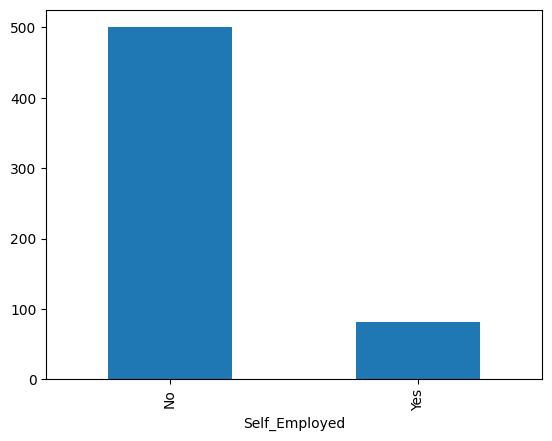

In [13]:
train['Self_Employed'].value_counts().plot(kind='bar')

<Axes: xlabel='Credit_History'>

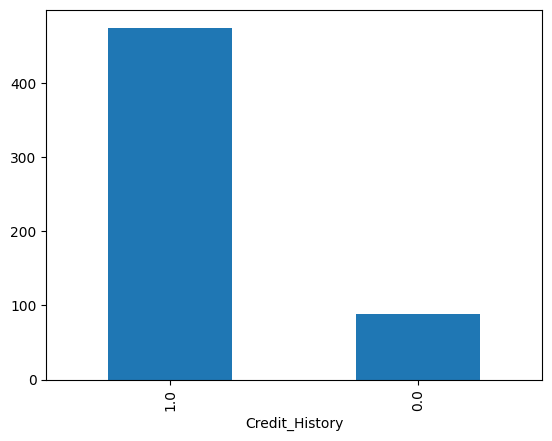

In [14]:
train['Credit_History'].value_counts().plot(kind='bar')

<Axes: xlabel='Property_Area'>

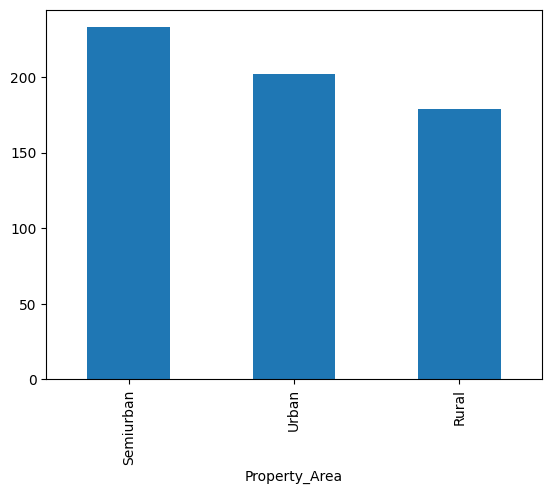

In [15]:
train['Property_Area'].value_counts().plot(kind='bar')

In [15]:
test['Gender'].fillna('Male', inplace=True) #We noticed that males were more common so we decide input with mode
test['Gender'] = test['Gender'].map({'Male': 0, 'Female': 1})


In [16]:
train['Gender'].fillna('Male', inplace=True)
train['Gender'] = train['Gender'].map({'Male': 0, 'Female': 1})

In [17]:
test['is_Urban'] = test['Property_Area'].map({'Urban': 1, 'Rural': 0, 'Semiurban':0})
test['is_Rural'] = test['Property_Area'].map({'Urban': 0, 'Rural': 1, 'Semiurban':0})
test['is_Semiurban'] = test['Property_Area'].map({'Urban': 0, 'Rural': 0, 'Semiurban':1})
test.drop(['Property_Area'], axis = 1 )

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,is_Urban,is_Rural,is_Semiurban
0,LP001015,0,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,1,0,0
1,LP001022,0,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,1,0,0
2,LP001031,0,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,1,0,0
3,LP001035,0,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,1,0,0
4,LP001051,0,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,0,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,1,0,0
363,LP002975,0,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,1,0,0
364,LP002980,0,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,0,0,1
365,LP002986,0,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,0,1,0


In [18]:
train['is_Urban'] = train['Property_Area'].map({'Urban': 1, 'Rural': 0, 'Semiurban':0})
train['is_Rural'] = train['Property_Area'].map({'Urban': 0, 'Rural': 1, 'Semiurban':0})
train['is_Semiurban'] = train['Property_Area'].map({'Urban': 0, 'Rural': 0, 'Semiurban':1})
train.drop(['Property_Area'], axis = 1 )


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,is_Urban,is_Rural,is_Semiurban
0,LP001002,0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y,1,0,0
1,LP001003,0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,0,1,0
2,LP001005,0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,1,0,0
3,LP001006,0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,1,0,0
4,LP001008,0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Y,0,1,0
610,LP002979,0,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Y,0,1,0
611,LP002983,0,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Y,1,0,0
612,LP002984,0,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Y,1,0,0


In [19]:
mode_Married = train['Married'].mode()[0]
train['Married'].fillna(mode_Married, inplace=True)
train['Married'] = train['Married'].map({'No': 0, 'Yes': 1})

In [20]:
test['Married'] = test['Married'].map({'No': 0, 'Yes': 1})

In [21]:
train['Dependents'].fillna(0, inplace=True)
train['Dependents'] = train['Dependents'].replace('3+', '3')
train['Dependents'] = pd.to_numeric(train['Dependents'], errors='coerce')

In [22]:
test['Dependents'].fillna(0, inplace=True)
test['Dependents'] = test['Dependents'].replace('3+', '3')
test['Dependents'] = pd.to_numeric(test['Dependents'], errors='coerce')

In [23]:
train['Education'] = train['Education'].map({'Not Graduate': 0, 'Graduate': 1})

In [24]:
test['Education'] = test['Education'].map({'Not Graduate': 0, 'Graduate': 1})

In [25]:
mode_SE = test['Self_Employed'].mode()[0]
test['Self_Employed'].fillna(mode_SE, inplace=True)

In [26]:
test['Self_Employed'] = test['Self_Employed'].map({'No': 0, 'Yes': 1})

In [27]:
mode_SE = train['Self_Employed'].mode()[0]
train['Self_Employed'].fillna(mode_SE, inplace=True)

In [28]:
train['Self_Employed'] = train['Self_Employed'].map({'No': 0, 'Yes': 1})

In [29]:
mean_LoanAmount = test['LoanAmount'].mean()
test['LoanAmount'].fillna(round(mean_LoanAmount,1), inplace=True)

In [30]:
mean_LoanAmount = train['LoanAmount'].mean()
train['LoanAmount'].fillna(round(mean_LoanAmount,1), inplace=True)


In [31]:
mode_Term = test['Loan_Amount_Term'].mode()[0]
test['Loan_Amount_Term'].fillna(mode_Term, inplace=True)

In [32]:
mode_Term = train['Loan_Amount_Term'].mode()[0]
train['Loan_Amount_Term'].fillna(mode_Term, inplace=True)

In [33]:
mode_Credit = train['Credit_History'].mode()[0]
train['Credit_History'].fillna(mode_Credit, inplace=True)

In [34]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,is_Urban,is_Rural,is_Semiurban
0,LP001002,0,0,0,1,0,5849,0.0,146.4,360.0,1.0,Urban,Y,1,0,0
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y,1,0,0
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,0,0
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,Y,0,1,0
610,LP002979,0,1,3,1,0,4106,0.0,40.0,180.0,1.0,Rural,Y,0,1,0
611,LP002983,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,Y,1,0,0
612,LP002984,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,Y,1,0,0


In [35]:
train.drop(['Property_Area'], axis =1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,is_Urban,is_Rural,is_Semiurban
0,LP001002,0,0,0,1,0,5849,0.0,146.4,360.0,1.0,Y,1,0,0
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,N,0,1,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Y,1,0,0
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Y,1,0,0
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Y,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,Y,0,1,0
610,LP002979,0,1,3,1,0,4106,0.0,40.0,180.0,1.0,Y,0,1,0
611,LP002983,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,Y,1,0,0
612,LP002984,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,Y,1,0,0


In [36]:
train['Loan_Status'] = train['Loan_Status'].map({'Y': 1, 'N': 0})

In [48]:
train_clean = train.drop(['Loan_ID'], axis = 1)

In [49]:
train_clean
train_clean = train_clean.drop(['Property_Area'], axis = 1)

In [68]:
X = train_clean.drop(['Loan_Status'], axis = 1)
Y = train_clean['Loan_Status']

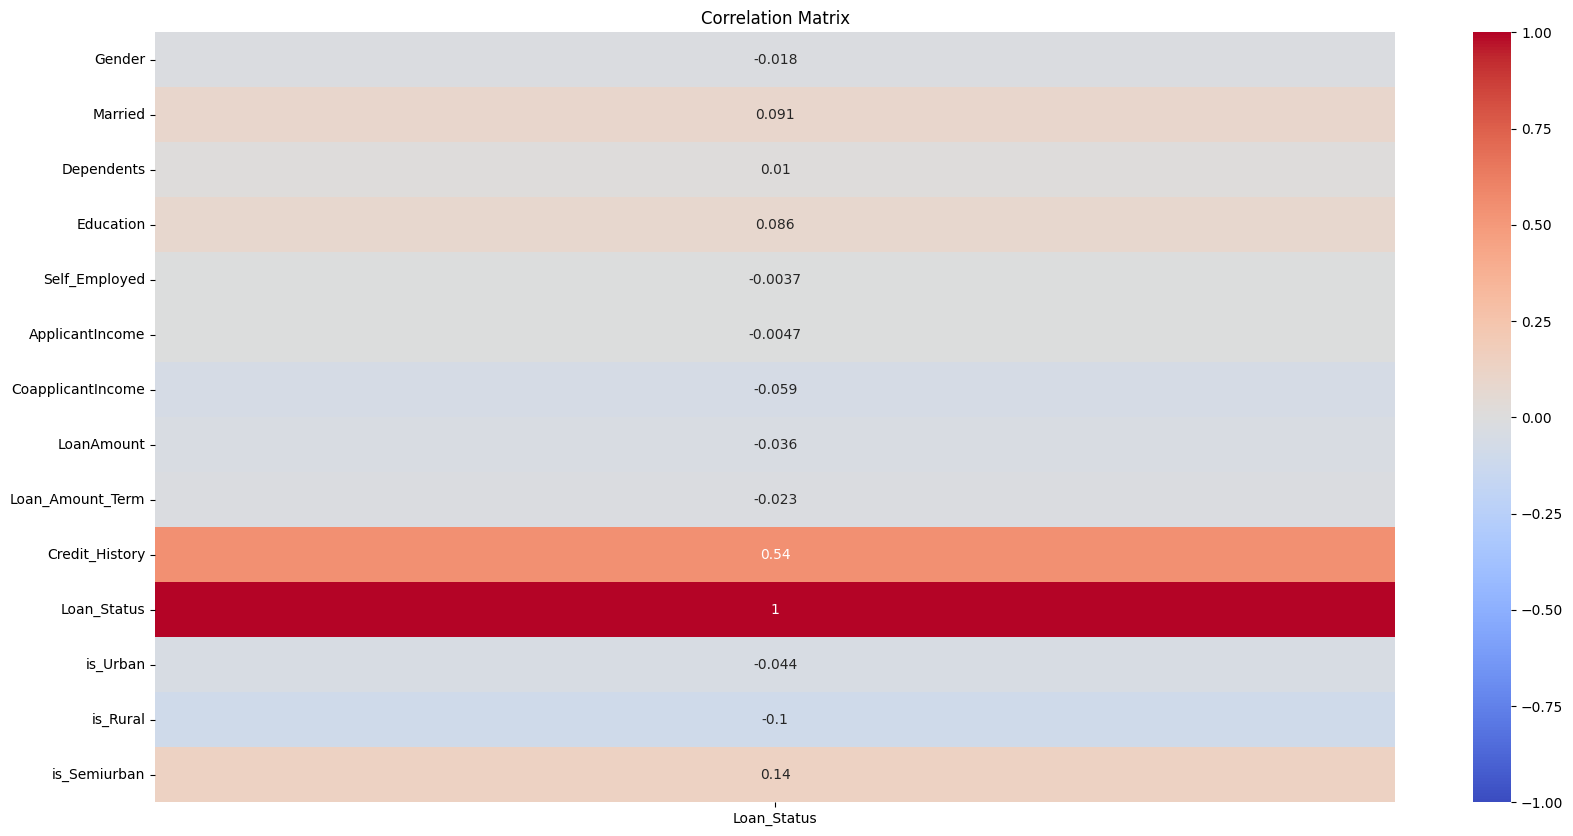

In [69]:
correlation_matrix = train_clean.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix[["Loan_Status"]], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [227]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [229]:
pred = knn.predict(X_test)
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

[[19 24]
 [ 7 73]]
              precision    recall  f1-score   support

           0       0.73      0.44      0.55        43
           1       0.75      0.91      0.82        80

    accuracy                           0.75       123
   macro avg       0.74      0.68      0.69       123
weighted avg       0.74      0.75      0.73       123



In [237]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

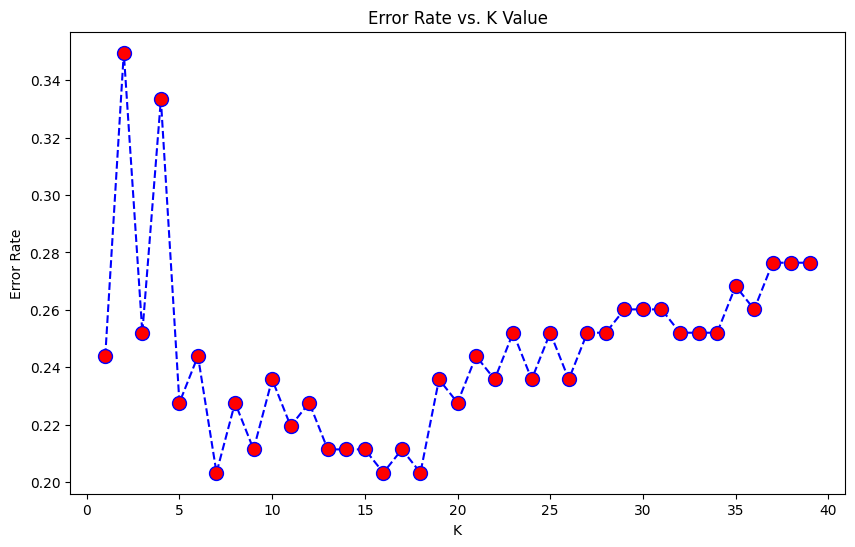

In [238]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [240]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

In [242]:
pred = knn.predict(X_test)
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

[[19 24]
 [ 1 79]]
              precision    recall  f1-score   support

           0       0.95      0.44      0.60        43
           1       0.77      0.99      0.86        80

    accuracy                           0.80       123
   macro avg       0.86      0.71      0.73       123
weighted avg       0.83      0.80      0.77       123



In [244]:
print(accuracy_score(Y_test,pred))

0.7967479674796748


In [ ]:
clf = MLPClassifier( random_state=42, verbose= True)

In [ ]:
clf.fit(X_train, Y_train)

Iteration 1, loss = 0.64439300
Iteration 2, loss = 0.62550723
Iteration 3, loss = 0.60924281
Iteration 4, loss = 0.59491944
Iteration 5, loss = 0.58161542
Iteration 6, loss = 0.56900919
Iteration 7, loss = 0.55744474
Iteration 8, loss = 0.54704320
Iteration 9, loss = 0.53734008
Iteration 10, loss = 0.52803770
Iteration 11, loss = 0.51969503
Iteration 12, loss = 0.51184610
Iteration 13, loss = 0.50491540
Iteration 14, loss = 0.49815407
Iteration 15, loss = 0.49194068
Iteration 16, loss = 0.48608720
Iteration 17, loss = 0.48075173
Iteration 18, loss = 0.47577397
Iteration 19, loss = 0.47109953
Iteration 20, loss = 0.46657122
Iteration 21, loss = 0.46257425
Iteration 22, loss = 0.45912767
Iteration 23, loss = 0.45548406
Iteration 24, loss = 0.45193031
Iteration 25, loss = 0.44874477
Iteration 26, loss = 0.44592413
Iteration 27, loss = 0.44313708
Iteration 28, loss = 0.44076361
Iteration 29, loss = 0.43847741
Iteration 30, loss = 0.43608913
Iteration 31, loss = 0.43419226
Iteration 32, los

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42, verbose=True)

In [ ]:
accuracy = clf.score(X_test, Y_test)
accuracy

0.7642276422764228

In [214]:
param_grid = {
    'learning_rate_init': [0.001, 0.01, 0.1],
    'hidden_layer_sizes': [(50, 50, 50), (100, 50, 100), (100, 100, 100), (25, 50, 25)],
    'learning_rate': ['adaptive', 'constant'],
    'early_stopping': [True, False]

}

In [215]:
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

print("Best parameters found:", grid_search.best_params_)


Iteration 1, loss = 0.87964431
Validation score: 0.300000
Iteration 2, loss = 0.83080646
Validation score: 0.300000
Iteration 3, loss = 0.78715453
Validation score: 0.300000
Iteration 4, loss = 0.75258387
Validation score: 0.375000
Iteration 5, loss = 0.72282757
Validation score: 0.525000
Iteration 6, loss = 0.69724912
Validation score: 0.550000
Iteration 7, loss = 0.67638259
Validation score: 0.650000
Iteration 8, loss = 0.65833742
Validation score: 0.625000
Iteration 9, loss = 0.64303518
Validation score: 0.675000
Iteration 10, loss = 0.62885465
Validation score: 0.725000
Iteration 11, loss = 0.61632967
Validation score: 0.725000
Iteration 12, loss = 0.60490442
Validation score: 0.750000
Iteration 13, loss = 0.59356517
Validation score: 0.750000
Iteration 14, loss = 0.58291442
Validation score: 0.750000
Iteration 15, loss = 0.57177258
Validation score: 0.775000
Iteration 16, loss = 0.56077643
Validation score: 0.775000
Iteration 17, loss = 0.55036134
Validation score: 0.775000
Iterat

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 72, loss = 0.31139108
Iteration 73, loss = 0.30850226
Iteration 74, loss = 0.30563562
Iteration 75, loss = 0.30271348
Iteration 76, loss = 0.29988852
Iteration 77, loss = 0.29692653
Iteration 78, loss = 0.29358696
Iteration 79, loss = 0.29062893
Iteration 80, loss = 0.28769366
Iteration 81, loss = 0.28455588
Iteration 82, loss = 0.28158822
Iteration 83, loss = 0.27867850
Iteration 84, loss = 0.27546426
Iteration 85, loss = 0.27263780
Iteration 86, loss = 0.26997333
Iteration 87, loss = 0.26655616
Iteration 88, loss = 0.26343983
Iteration 89, loss = 0.26050970
Iteration 90, loss = 0.25769967
Iteration 91, loss = 0.25507523
Iteration 92, loss = 0.25192144
Iteration 93, loss = 0.24991053
Iteration 94, loss = 0.24619426
Iteration 95, loss = 0.24393041
Iteration 96, loss = 0.24215393
Iteration 97, loss = 0.23831117
Iteration 98, loss = 0.23651715
Iteration 99, loss = 0.23323121
Iteration 100, loss = 0.23055770
Iteration 101, loss = 0.22759618
Iteration 102, loss = 0.22490896
Itera

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 42, loss = 0.38243015
Iteration 43, loss = 0.37986038
Iteration 44, loss = 0.37736247
Iteration 45, loss = 0.37429694
Iteration 46, loss = 0.37130668
Iteration 47, loss = 0.36846351
Iteration 48, loss = 0.36613353
Iteration 49, loss = 0.36314071
Iteration 50, loss = 0.36086986
Iteration 51, loss = 0.35795036
Iteration 52, loss = 0.35510783
Iteration 53, loss = 0.35249399
Iteration 54, loss = 0.34960900
Iteration 55, loss = 0.34707071
Iteration 56, loss = 0.34458280
Iteration 57, loss = 0.34154051
Iteration 58, loss = 0.33872408
Iteration 59, loss = 0.33607931
Iteration 60, loss = 0.33334565
Iteration 61, loss = 0.33055688
Iteration 62, loss = 0.32765311
Iteration 63, loss = 0.32575996
Iteration 64, loss = 0.32248946
Iteration 65, loss = 0.32016427
Iteration 66, loss = 0.31695381
Iteration 67, loss = 0.31426193
Iteration 68, loss = 0.31150203
Iteration 69, loss = 0.30866964
Iteration 70, loss = 0.30591314
Iteration 71, loss = 0.30296281
Iteration 72, loss = 0.30011350
Iteratio

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.87824897
Iteration 2, loss = 0.82970392
Iteration 3, loss = 0.78593944
Iteration 4, loss = 0.74876824
Iteration 5, loss = 0.72019504
Iteration 6, loss = 0.69345745
Iteration 7, loss = 0.67235968
Iteration 8, loss = 0.65359172
Iteration 9, loss = 0.63730060
Iteration 10, loss = 0.62345324
Iteration 11, loss = 0.61160211
Iteration 12, loss = 0.60090079
Iteration 13, loss = 0.58951395
Iteration 14, loss = 0.57821993
Iteration 15, loss = 0.56705986
Iteration 16, loss = 0.55593845
Iteration 17, loss = 0.54432355
Iteration 18, loss = 0.53420591
Iteration 19, loss = 0.52347301
Iteration 20, loss = 0.51325230
Iteration 21, loss = 0.50340828
Iteration 22, loss = 0.49427424
Iteration 23, loss = 0.48515962
Iteration 24, loss = 0.47636151
Iteration 25, loss = 0.46886052
Iteration 26, loss = 0.46084813
Iteration 27, loss = 0.45337956
Iteration 28, loss = 0.44753812
Iteration 29, loss = 0.44097844
Iteration 30, loss = 0.43582591
Iteration 31, loss = 0.43065748
Iteration 32, los

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 80, loss = 0.30207686
Iteration 81, loss = 0.29920972
Iteration 82, loss = 0.29619560
Iteration 83, loss = 0.29377022
Iteration 84, loss = 0.29047070
Iteration 85, loss = 0.28750152
Iteration 86, loss = 0.28454702
Iteration 87, loss = 0.28150462
Iteration 88, loss = 0.27834825
Iteration 89, loss = 0.27553112
Iteration 90, loss = 0.27222252
Iteration 91, loss = 0.26922511
Iteration 92, loss = 0.26622825
Iteration 93, loss = 0.26331179
Iteration 94, loss = 0.26040215
Iteration 95, loss = 0.25721600
Iteration 96, loss = 0.25427108
Iteration 97, loss = 0.25083252
Iteration 98, loss = 0.24799473
Iteration 99, loss = 0.24457147
Iteration 100, loss = 0.24203212
Iteration 101, loss = 0.23888084
Iteration 102, loss = 0.23645718
Iteration 103, loss = 0.23348340
Iteration 104, loss = 0.23051935
Iteration 105, loss = 0.22731362
Iteration 106, loss = 0.22454784
Iteration 107, loss = 0.22142243
Iteration 108, loss = 0.21892687
Iteration 109, loss = 0.21586325
Iteration 110, loss = 0.213045

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 63, loss = 0.07679991
Iteration 64, loss = 0.07399055
Iteration 65, loss = 0.08229238
Iteration 66, loss = 0.07115944
Iteration 67, loss = 0.07071464
Iteration 68, loss = 0.07588326
Iteration 69, loss = 0.06191361
Iteration 70, loss = 0.06747825
Iteration 71, loss = 0.06580166
Iteration 72, loss = 0.06495894
Iteration 73, loss = 0.06317607
Iteration 74, loss = 0.06339261
Iteration 75, loss = 0.06420463
Iteration 76, loss = 0.06330979
Iteration 77, loss = 0.06296269
Iteration 78, loss = 0.05459841
Iteration 79, loss = 0.05444635
Iteration 80, loss = 0.05934534
Iteration 81, loss = 0.05625331
Iteration 82, loss = 0.05412552
Iteration 83, loss = 0.05378506
Iteration 84, loss = 0.05333498
Iteration 85, loss = 0.05467148
Iteration 86, loss = 0.05207308
Iteration 87, loss = 0.05224858
Iteration 88, loss = 0.05426377
Iteration 89, loss = 0.05733683
Iteration 90, loss = 0.05170921
Iteration 91, loss = 0.04818295
Iteration 92, loss = 0.05813478
Iteration 93, loss = 0.05340404
Iteratio

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 0.60055665
Iteration 13, loss = 0.58863135
Iteration 14, loss = 0.57779081
Iteration 15, loss = 0.56661056
Iteration 16, loss = 0.55539572
Iteration 17, loss = 0.54379802
Iteration 18, loss = 0.53319293
Iteration 19, loss = 0.52273806
Iteration 20, loss = 0.51190532
Iteration 21, loss = 0.50246673
Iteration 22, loss = 0.49355368
Iteration 23, loss = 0.48421385
Iteration 24, loss = 0.47654452
Iteration 25, loss = 0.46805128
Iteration 26, loss = 0.46026282
Iteration 27, loss = 0.45309390
Iteration 28, loss = 0.44676657
Iteration 29, loss = 0.44056608
Iteration 30, loss = 0.43521122
Iteration 31, loss = 0.42975960
Iteration 32, loss = 0.42554157
Iteration 33, loss = 0.42139069
Iteration 34, loss = 0.41733914
Iteration 35, loss = 0.41381205
Iteration 36, loss = 0.41038764
Iteration 37, loss = 0.40694375
Iteration 38, loss = 0.40369400
Iteration 39, loss = 0.40066133
Iteration 40, loss = 0.39758542
Iteration 41, loss = 0.39507556
Iteration 42, loss = 0.39204141
Iteratio

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 88, loss = 0.25309818
Iteration 89, loss = 0.25006315
Iteration 90, loss = 0.24709943
Iteration 91, loss = 0.24422020
Iteration 92, loss = 0.24135930
Iteration 93, loss = 0.23885221
Iteration 94, loss = 0.23530473
Iteration 95, loss = 0.23292825
Iteration 96, loss = 0.23059773
Iteration 97, loss = 0.22641019
Iteration 98, loss = 0.22512478
Iteration 99, loss = 0.22155875
Iteration 100, loss = 0.21803700
Iteration 101, loss = 0.21520359
Iteration 102, loss = 0.21307889
Iteration 103, loss = 0.21048730
Iteration 104, loss = 0.20720297
Iteration 105, loss = 0.20421006
Iteration 106, loss = 0.20162535
Iteration 107, loss = 0.19930981
Iteration 108, loss = 0.19631975
Iteration 109, loss = 0.19367745
Iteration 110, loss = 0.19100517
Iteration 111, loss = 0.18867292
Iteration 112, loss = 0.18648906
Iteration 113, loss = 0.18365846
Iteration 114, loss = 0.18137592
Iteration 115, loss = 0.17911485
Iteration 116, loss = 0.17617947
Iteration 117, loss = 0.17525100
Iteration 118, loss = 

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 69, loss = 0.31777366
Iteration 70, loss = 0.31513140
Iteration 71, loss = 0.31203148
Iteration 72, loss = 0.30931832
Iteration 73, loss = 0.30627748
Iteration 74, loss = 0.30356169
Iteration 75, loss = 0.30107992
Iteration 76, loss = 0.29813702
Iteration 77, loss = 0.29526102
Iteration 78, loss = 0.29235221
Iteration 79, loss = 0.28950634
Iteration 80, loss = 0.28697102
Iteration 81, loss = 0.28375863
Iteration 82, loss = 0.28084833
Iteration 83, loss = 0.27915750
Iteration 84, loss = 0.27521229
Iteration 85, loss = 0.27252236
Iteration 86, loss = 0.26999240
Iteration 87, loss = 0.26692344
Iteration 88, loss = 0.26446633
Iteration 89, loss = 0.26149244
Iteration 90, loss = 0.25860654
Iteration 91, loss = 0.25594207
Iteration 92, loss = 0.25327947
Iteration 93, loss = 0.25039841
Iteration 94, loss = 0.24770309
Iteration 95, loss = 0.24503848
Iteration 96, loss = 0.24256538
Iteration 97, loss = 0.23947824
Iteration 98, loss = 0.23732000
Iteration 99, loss = 0.23441282
Iteratio

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 46, loss = 0.39085360
Iteration 47, loss = 0.38831641
Iteration 48, loss = 0.38591632
Iteration 49, loss = 0.38344189
Iteration 50, loss = 0.38132603
Iteration 51, loss = 0.37853808
Iteration 52, loss = 0.37617321
Iteration 53, loss = 0.37383156
Iteration 54, loss = 0.37131543
Iteration 55, loss = 0.36893744
Iteration 56, loss = 0.36637913
Iteration 57, loss = 0.36392004
Iteration 58, loss = 0.36183163
Iteration 59, loss = 0.35909582
Iteration 60, loss = 0.35640337
Iteration 61, loss = 0.35383459
Iteration 62, loss = 0.35128101
Iteration 63, loss = 0.34885257
Iteration 64, loss = 0.34626156
Iteration 65, loss = 0.34371781
Iteration 66, loss = 0.34087617
Iteration 67, loss = 0.33834109
Iteration 68, loss = 0.33592243
Iteration 69, loss = 0.33281396
Iteration 70, loss = 0.33020137
Iteration 71, loss = 0.32716711
Iteration 72, loss = 0.32483244
Iteration 73, loss = 0.32179257
Iteration 74, loss = 0.31929984
Iteration 75, loss = 0.31653356
Iteration 76, loss = 0.31402482
Iteratio

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 21, loss = 0.28355639
Iteration 22, loss = 0.27032492
Iteration 23, loss = 0.25654208
Iteration 24, loss = 0.24675938
Iteration 25, loss = 0.23020813
Iteration 26, loss = 0.22149408
Iteration 27, loss = 0.21504726
Iteration 28, loss = 0.19978127
Iteration 29, loss = 0.19464654
Iteration 30, loss = 0.18909426
Iteration 31, loss = 0.17461433
Iteration 32, loss = 0.17137864
Iteration 33, loss = 0.17123636
Iteration 34, loss = 0.15405495
Iteration 35, loss = 0.15312946
Iteration 36, loss = 0.14115856
Iteration 37, loss = 0.13724325
Iteration 38, loss = 0.13919987
Iteration 39, loss = 0.15842007
Iteration 40, loss = 0.15836365
Iteration 41, loss = 0.15642189
Iteration 42, loss = 0.12685275
Iteration 43, loss = 0.14430389
Iteration 44, loss = 0.12182655
Iteration 45, loss = 0.10235000
Iteration 46, loss = 0.11469308
Iteration 47, loss = 0.10798758
Iteration 48, loss = 0.09580093
Iteration 49, loss = 0.09987783
Iteration 50, loss = 0.10707684
Iteration 51, loss = 0.08922761
Iteratio

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 63, loss = 0.21772240
Iteration 64, loss = 0.21382931
Iteration 65, loss = 0.21075944
Iteration 66, loss = 0.20880424
Iteration 67, loss = 0.20531736
Iteration 68, loss = 0.20156346
Iteration 69, loss = 0.19850322
Iteration 70, loss = 0.19545220
Iteration 71, loss = 0.19309427
Iteration 72, loss = 0.18973452
Iteration 73, loss = 0.18847424
Iteration 74, loss = 0.18491938
Iteration 75, loss = 0.18205275
Iteration 76, loss = 0.17914791
Iteration 77, loss = 0.17677550
Iteration 78, loss = 0.17371056
Iteration 79, loss = 0.17103285
Iteration 80, loss = 0.16818743
Iteration 81, loss = 0.16536565
Iteration 82, loss = 0.16422022
Iteration 83, loss = 0.16053860
Iteration 84, loss = 0.16042427
Iteration 85, loss = 0.15645810
Iteration 86, loss = 0.15559857
Iteration 87, loss = 0.15244310
Iteration 88, loss = 0.15166546
Iteration 89, loss = 0.14889835
Iteration 90, loss = 0.14568471
Iteration 91, loss = 0.14450486
Iteration 92, loss = 0.14135027
Iteration 93, loss = 0.14273731
Iteratio

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 66, loss = 0.18467495
Iteration 67, loss = 0.18131943
Iteration 68, loss = 0.17643124
Iteration 69, loss = 0.17334388
Iteration 70, loss = 0.16898181
Iteration 71, loss = 0.16693931
Iteration 72, loss = 0.16217408
Iteration 73, loss = 0.16042648
Iteration 74, loss = 0.15676237
Iteration 75, loss = 0.15228394
Iteration 76, loss = 0.14927171
Iteration 77, loss = 0.14805254
Iteration 78, loss = 0.14353769
Iteration 79, loss = 0.14068104
Iteration 80, loss = 0.13845757
Iteration 81, loss = 0.13536638
Iteration 82, loss = 0.13372388
Iteration 83, loss = 0.13051670
Iteration 84, loss = 0.12850683
Iteration 85, loss = 0.12794917
Iteration 86, loss = 0.12419911
Iteration 87, loss = 0.12246777
Iteration 88, loss = 0.12181565
Iteration 89, loss = 0.11867425
Iteration 90, loss = 0.11735127
Iteration 91, loss = 0.11428899
Iteration 92, loss = 0.11130522
Iteration 93, loss = 0.11156432
Iteration 94, loss = 0.10745095
Iteration 95, loss = 0.10779057
Iteration 96, loss = 0.10497359
Iteratio

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.66853202
Iteration 2, loss = 0.64014674
Iteration 3, loss = 0.61583378
Iteration 4, loss = 0.59827174
Iteration 5, loss = 0.57955669
Iteration 6, loss = 0.56486523
Iteration 7, loss = 0.54944006
Iteration 8, loss = 0.53520664
Iteration 9, loss = 0.51837436
Iteration 10, loss = 0.50200557
Iteration 11, loss = 0.48641304
Iteration 12, loss = 0.47106923
Iteration 13, loss = 0.45643185
Iteration 14, loss = 0.44225868
Iteration 15, loss = 0.43098517
Iteration 16, loss = 0.42099996
Iteration 17, loss = 0.41200033
Iteration 18, loss = 0.40573786
Iteration 19, loss = 0.39846525
Iteration 20, loss = 0.39333257
Iteration 21, loss = 0.38795243
Iteration 22, loss = 0.38302712
Iteration 23, loss = 0.37865525
Iteration 24, loss = 0.37464733
Iteration 25, loss = 0.37020346
Iteration 26, loss = 0.36618246
Iteration 27, loss = 0.36235992
Iteration 28, loss = 0.35862162
Iteration 29, loss = 0.35432225
Iteration 30, loss = 0.35013615
Iteration 31, loss = 0.34603042
Iteration 32, los

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.66791232
Iteration 2, loss = 0.64038054
Iteration 3, loss = 0.61623921
Iteration 4, loss = 0.59893292
Iteration 5, loss = 0.58187073
Iteration 6, loss = 0.56805383
Iteration 7, loss = 0.55338489
Iteration 8, loss = 0.53899942
Iteration 9, loss = 0.52330897
Iteration 10, loss = 0.50778946
Iteration 11, loss = 0.49288159
Iteration 12, loss = 0.47817632
Iteration 13, loss = 0.46432556
Iteration 14, loss = 0.45186024
Iteration 15, loss = 0.44143404
Iteration 16, loss = 0.43190080
Iteration 17, loss = 0.42324857
Iteration 18, loss = 0.41658563
Iteration 19, loss = 0.41016416
Iteration 20, loss = 0.40518323
Iteration 21, loss = 0.39922284
Iteration 22, loss = 0.39412359
Iteration 23, loss = 0.38974640
Iteration 24, loss = 0.38529478
Iteration 25, loss = 0.38062881
Iteration 26, loss = 0.37600612
Iteration 27, loss = 0.37204861
Iteration 28, loss = 0.36712552
Iteration 29, loss = 0.36291919
Iteration 30, loss = 0.35826009
Iteration 31, loss = 0.35413187
Iteration 32, los

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.62745165
Iteration 2, loss = 0.52792723
Iteration 3, loss = 0.46668586
Iteration 4, loss = 0.43007116
Iteration 5, loss = 0.40732912
Iteration 6, loss = 0.39510023
Iteration 7, loss = 0.38299398
Iteration 8, loss = 0.35682633
Iteration 9, loss = 0.34065694
Iteration 10, loss = 0.32651204
Iteration 11, loss = 0.31021285
Iteration 12, loss = 0.29270175
Iteration 13, loss = 0.28821157
Iteration 14, loss = 0.29561879
Iteration 15, loss = 0.26869186
Iteration 16, loss = 0.24646288
Iteration 17, loss = 0.24935136
Iteration 18, loss = 0.22456592
Iteration 19, loss = 0.20329166
Iteration 20, loss = 0.19789669
Iteration 21, loss = 0.19456607
Iteration 22, loss = 0.17683345
Iteration 23, loss = 0.16473610
Iteration 24, loss = 0.15287252
Iteration 25, loss = 0.15458551
Iteration 26, loss = 0.15003129
Iteration 27, loss = 0.15180020
Iteration 28, loss = 0.13065709
Iteration 29, loss = 0.13433165
Iteration 30, loss = 0.12696275
Iteration 31, loss = 0.13517079
Iteration 32, los

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 20, loss = 0.39675148
Iteration 21, loss = 0.39218277
Iteration 22, loss = 0.38662494
Iteration 23, loss = 0.38181577
Iteration 24, loss = 0.37705951
Iteration 25, loss = 0.37226607
Iteration 26, loss = 0.36780519
Iteration 27, loss = 0.36311464
Iteration 28, loss = 0.35849182
Iteration 29, loss = 0.35420157
Iteration 30, loss = 0.34916931
Iteration 31, loss = 0.34488622
Iteration 32, loss = 0.34043546
Iteration 33, loss = 0.33640946
Iteration 34, loss = 0.33162019
Iteration 35, loss = 0.32753802
Iteration 36, loss = 0.32305034
Iteration 37, loss = 0.31881250
Iteration 38, loss = 0.31459315
Iteration 39, loss = 0.31033887
Iteration 40, loss = 0.30564308
Iteration 41, loss = 0.30162303
Iteration 42, loss = 0.29726655
Iteration 43, loss = 0.29252752
Iteration 44, loss = 0.28836744
Iteration 45, loss = 0.28399781
Iteration 46, loss = 0.28056871
Iteration 47, loss = 0.27552036
Iteration 48, loss = 0.27160400
Iteration 49, loss = 0.26755178
Iteration 50, loss = 0.26314079
Iteratio

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.50124283
Iteration 11, loss = 0.48627469
Iteration 12, loss = 0.47131444
Iteration 13, loss = 0.45824078
Iteration 14, loss = 0.44527242
Iteration 15, loss = 0.43442228
Iteration 16, loss = 0.42433420
Iteration 17, loss = 0.41623467
Iteration 18, loss = 0.40989595
Iteration 19, loss = 0.40342122
Iteration 20, loss = 0.39768638
Iteration 21, loss = 0.39270782
Iteration 22, loss = 0.38735551
Iteration 23, loss = 0.38273367
Iteration 24, loss = 0.37823587
Iteration 25, loss = 0.37347325
Iteration 26, loss = 0.36891949
Iteration 27, loss = 0.36461605
Iteration 28, loss = 0.35995072
Iteration 29, loss = 0.35554006
Iteration 30, loss = 0.35095723
Iteration 31, loss = 0.34663751
Iteration 32, loss = 0.34190503
Iteration 33, loss = 0.33783236
Iteration 34, loss = 0.33337017
Iteration 35, loss = 0.32843144
Iteration 36, loss = 0.32369861
Iteration 37, loss = 0.31902735
Iteration 38, loss = 0.31453148
Iteration 39, loss = 0.30988719
Iteration 40, loss = 0.30525032
Iteratio

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.43098517
Iteration 16, loss = 0.42099996
Iteration 17, loss = 0.41200033
Iteration 18, loss = 0.40573786
Iteration 19, loss = 0.39846525
Iteration 20, loss = 0.39333257
Iteration 21, loss = 0.38795243
Iteration 22, loss = 0.38302712
Iteration 23, loss = 0.37865525
Iteration 24, loss = 0.37464733
Iteration 25, loss = 0.37020346
Iteration 26, loss = 0.36618246
Iteration 27, loss = 0.36235992
Iteration 28, loss = 0.35862162
Iteration 29, loss = 0.35432225
Iteration 30, loss = 0.35013615
Iteration 31, loss = 0.34603042
Iteration 32, loss = 0.34232361
Iteration 33, loss = 0.33822252
Iteration 34, loss = 0.33439723
Iteration 35, loss = 0.33076098
Iteration 36, loss = 0.32687664
Iteration 37, loss = 0.32272290
Iteration 38, loss = 0.31897025
Iteration 39, loss = 0.31587084
Iteration 40, loss = 0.31132301
Iteration 41, loss = 0.30765874
Iteration 42, loss = 0.30337076
Iteration 43, loss = 0.29951108
Iteration 44, loss = 0.29715127
Iteration 45, loss = 0.29260439
Iteratio

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 19, loss = 0.41016416
Iteration 20, loss = 0.40518323
Iteration 21, loss = 0.39922284
Iteration 22, loss = 0.39412359
Iteration 23, loss = 0.38974640
Iteration 24, loss = 0.38529478
Iteration 25, loss = 0.38062881
Iteration 26, loss = 0.37600612
Iteration 27, loss = 0.37204861
Iteration 28, loss = 0.36712552
Iteration 29, loss = 0.36291919
Iteration 30, loss = 0.35826009
Iteration 31, loss = 0.35413187
Iteration 32, loss = 0.34981013
Iteration 33, loss = 0.34534132
Iteration 34, loss = 0.34119244
Iteration 35, loss = 0.33691544
Iteration 36, loss = 0.33224140
Iteration 37, loss = 0.32733811
Iteration 38, loss = 0.32348779
Iteration 39, loss = 0.31921111
Iteration 40, loss = 0.31430611
Iteration 41, loss = 0.31031388
Iteration 42, loss = 0.30562290
Iteration 43, loss = 0.30073261
Iteration 44, loss = 0.29607288
Iteration 45, loss = 0.29195243
Iteration 46, loss = 0.28686554
Iteration 47, loss = 0.28210554
Iteration 48, loss = 0.27744703
Iteration 49, loss = 0.27334664
Iteratio

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 0.28821157
Iteration 14, loss = 0.29561879
Iteration 15, loss = 0.26869186
Iteration 16, loss = 0.24646288
Iteration 17, loss = 0.24935136
Iteration 18, loss = 0.22456592
Iteration 19, loss = 0.20329166
Iteration 20, loss = 0.19789669
Iteration 21, loss = 0.19456607
Iteration 22, loss = 0.17683345
Iteration 23, loss = 0.16473610
Iteration 24, loss = 0.15287252
Iteration 25, loss = 0.15458551
Iteration 26, loss = 0.15003129
Iteration 27, loss = 0.15180020
Iteration 28, loss = 0.13065709
Iteration 29, loss = 0.13433165
Iteration 30, loss = 0.12696275
Iteration 31, loss = 0.13517079
Iteration 32, loss = 0.11671498
Iteration 33, loss = 0.12263022
Iteration 34, loss = 0.10496737
Iteration 35, loss = 0.10382545
Iteration 36, loss = 0.10285372
Iteration 37, loss = 0.10256640
Iteration 38, loss = 0.09708948
Iteration 39, loss = 0.09057319
Iteration 40, loss = 0.08787286
Iteration 41, loss = 0.09607374
Iteration 42, loss = 0.09752322
Iteration 43, loss = 0.10788675
Iteratio

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 0.48687421
Iteration 10, loss = 0.47022349
Iteration 11, loss = 0.45520353
Iteration 12, loss = 0.44277561
Iteration 13, loss = 0.43049628
Iteration 14, loss = 0.42003183
Iteration 15, loss = 0.41237391
Iteration 16, loss = 0.40621361
Iteration 17, loss = 0.39957556
Iteration 18, loss = 0.39406746
Iteration 19, loss = 0.38778847
Iteration 20, loss = 0.38249421
Iteration 21, loss = 0.37654610
Iteration 22, loss = 0.37096408
Iteration 23, loss = 0.36567667
Iteration 24, loss = 0.35994384
Iteration 25, loss = 0.35488101
Iteration 26, loss = 0.34905940
Iteration 27, loss = 0.34328015
Iteration 28, loss = 0.33881621
Iteration 29, loss = 0.33353653
Iteration 30, loss = 0.32868626
Iteration 31, loss = 0.32330203
Iteration 32, loss = 0.31821376
Iteration 33, loss = 0.31452156
Iteration 34, loss = 0.30900852
Iteration 35, loss = 0.30448092
Iteration 36, loss = 0.29952747
Iteration 37, loss = 0.29456962
Iteration 38, loss = 0.29001718
Iteration 39, loss = 0.28503782
Iteration

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.41527968
Iteration 16, loss = 0.40949440
Iteration 17, loss = 0.40398394
Iteration 18, loss = 0.39836541
Iteration 19, loss = 0.39266192
Iteration 20, loss = 0.38777768
Iteration 21, loss = 0.38219146
Iteration 22, loss = 0.37780677
Iteration 23, loss = 0.37159235
Iteration 24, loss = 0.36638733
Iteration 25, loss = 0.36096564
Iteration 26, loss = 0.35554796
Iteration 27, loss = 0.35011853
Iteration 28, loss = 0.34554229
Iteration 29, loss = 0.34026712
Iteration 30, loss = 0.33526744
Iteration 31, loss = 0.33006262
Iteration 32, loss = 0.32475860
Iteration 33, loss = 0.32032390
Iteration 34, loss = 0.31514803
Iteration 35, loss = 0.30975225
Iteration 36, loss = 0.30413257
Iteration 37, loss = 0.29905967
Iteration 38, loss = 0.29373357
Iteration 39, loss = 0.28884085
Iteration 40, loss = 0.28321432
Iteration 41, loss = 0.27816908
Iteration 42, loss = 0.27269526
Iteration 43, loss = 0.26763814
Iteration 44, loss = 0.26306353
Iteration 45, loss = 0.25709307
Iteratio

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.46335088
Iteration 11, loss = 0.44872968
Iteration 12, loss = 0.43585957
Iteration 13, loss = 0.42312096
Iteration 14, loss = 0.41343362
Iteration 15, loss = 0.40502141
Iteration 16, loss = 0.39952542
Iteration 17, loss = 0.39501049
Iteration 18, loss = 0.38883437
Iteration 19, loss = 0.38374699
Iteration 20, loss = 0.37881374
Iteration 21, loss = 0.37398775
Iteration 22, loss = 0.36926352
Iteration 23, loss = 0.36396683
Iteration 24, loss = 0.35909594
Iteration 25, loss = 0.35406385
Iteration 26, loss = 0.34939455
Iteration 27, loss = 0.34497776
Iteration 28, loss = 0.34002120
Iteration 29, loss = 0.33551907
Iteration 30, loss = 0.33147139
Iteration 31, loss = 0.32700377
Iteration 32, loss = 0.32228432
Iteration 33, loss = 0.31814385
Iteration 34, loss = 0.31414100
Iteration 35, loss = 0.30988068
Iteration 36, loss = 0.30471705
Iteration 37, loss = 0.29961552
Iteration 38, loss = 0.29546721
Iteration 39, loss = 0.29219731
Iteration 40, loss = 0.28642481
Iteratio

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 45, loss = 0.26399650
Iteration 46, loss = 0.26100414
Iteration 47, loss = 0.25521295
Iteration 48, loss = 0.24924688
Iteration 49, loss = 0.24538280
Iteration 50, loss = 0.23998149
Iteration 51, loss = 0.23504350
Iteration 52, loss = 0.23069620
Iteration 53, loss = 0.22538634
Iteration 54, loss = 0.22080462
Iteration 55, loss = 0.21552683
Iteration 56, loss = 0.21268819
Iteration 57, loss = 0.20771450
Iteration 58, loss = 0.20265029
Iteration 59, loss = 0.19929700
Iteration 60, loss = 0.19416669
Iteration 61, loss = 0.18978247
Iteration 62, loss = 0.18597357
Iteration 63, loss = 0.18219151
Iteration 64, loss = 0.17989536
Iteration 65, loss = 0.17373706
Iteration 66, loss = 0.16921793
Iteration 67, loss = 0.16646436
Iteration 68, loss = 0.16370739
Iteration 69, loss = 0.15904875
Iteration 70, loss = 0.15592079
Iteration 71, loss = 0.15231597
Iteration 72, loss = 0.14995153
Iteration 73, loss = 0.14605239
Iteration 74, loss = 0.14620690
Iteration 75, loss = 0.14336084
Iteratio

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 40, loss = 0.09729803
Iteration 41, loss = 0.09983882
Iteration 42, loss = 0.08433321
Iteration 43, loss = 0.08726137
Iteration 44, loss = 0.08504308
Iteration 45, loss = 0.08438954
Iteration 46, loss = 0.08555642
Iteration 47, loss = 0.07726260
Iteration 48, loss = 0.07808608
Iteration 49, loss = 0.07098050
Iteration 50, loss = 0.07074656
Iteration 51, loss = 0.07089876
Iteration 52, loss = 0.06910067
Iteration 53, loss = 0.06880548
Iteration 54, loss = 0.07051933
Iteration 55, loss = 0.06596250
Iteration 56, loss = 0.06538217
Iteration 57, loss = 0.06357457
Iteration 58, loss = 0.07248237
Iteration 59, loss = 0.07147540
Iteration 60, loss = 0.06955716
Iteration 61, loss = 0.06773430
Iteration 62, loss = 0.07649573
Iteration 63, loss = 0.06186549
Iteration 64, loss = 0.08244367
Iteration 65, loss = 0.06155270
Iteration 66, loss = 0.07296859
Iteration 67, loss = 0.07048841
Iteration 68, loss = 0.06672460
Iteration 69, loss = 0.06369182
Iteration 70, loss = 0.06369056
Iteratio

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 39, loss = 0.28503782
Iteration 40, loss = 0.28017567
Iteration 41, loss = 0.27575457
Iteration 42, loss = 0.27094632
Iteration 43, loss = 0.26763007
Iteration 44, loss = 0.26222441
Iteration 45, loss = 0.25764102
Iteration 46, loss = 0.25416300
Iteration 47, loss = 0.24898895
Iteration 48, loss = 0.24477902
Iteration 49, loss = 0.24159836
Iteration 50, loss = 0.23592077
Iteration 51, loss = 0.23254972
Iteration 52, loss = 0.22854455
Iteration 53, loss = 0.22510051
Iteration 54, loss = 0.22003621
Iteration 55, loss = 0.21718885
Iteration 56, loss = 0.21240589
Iteration 57, loss = 0.20911686
Iteration 58, loss = 0.20553065
Iteration 59, loss = 0.20171794
Iteration 60, loss = 0.19874005
Iteration 61, loss = 0.19494967
Iteration 62, loss = 0.19277981
Iteration 63, loss = 0.18752332
Iteration 64, loss = 0.18471494
Iteration 65, loss = 0.18171375
Iteration 66, loss = 0.17787203
Iteration 67, loss = 0.17511917
Iteration 68, loss = 0.17287583
Iteration 69, loss = 0.16937239
Iteratio

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 29, loss = 0.34026712
Iteration 30, loss = 0.33526744
Iteration 31, loss = 0.33006262
Iteration 32, loss = 0.32475860
Iteration 33, loss = 0.32032390
Iteration 34, loss = 0.31514803
Iteration 35, loss = 0.30975225
Iteration 36, loss = 0.30413257
Iteration 37, loss = 0.29905967
Iteration 38, loss = 0.29373357
Iteration 39, loss = 0.28884085
Iteration 40, loss = 0.28321432
Iteration 41, loss = 0.27816908
Iteration 42, loss = 0.27269526
Iteration 43, loss = 0.26763814
Iteration 44, loss = 0.26306353
Iteration 45, loss = 0.25709307
Iteration 46, loss = 0.25168860
Iteration 47, loss = 0.24667542
Iteration 48, loss = 0.24134834
Iteration 49, loss = 0.23722776
Iteration 50, loss = 0.23114870
Iteration 51, loss = 0.22624275
Iteration 52, loss = 0.22177582
Iteration 53, loss = 0.21707722
Iteration 54, loss = 0.21199043
Iteration 55, loss = 0.20804002
Iteration 56, loss = 0.20277485
Iteration 57, loss = 0.19908277
Iteration 58, loss = 0.19429802
Iteration 59, loss = 0.18903639
Iteratio

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 24, loss = 0.35909594
Iteration 25, loss = 0.35406385
Iteration 26, loss = 0.34939455
Iteration 27, loss = 0.34497776
Iteration 28, loss = 0.34002120
Iteration 29, loss = 0.33551907
Iteration 30, loss = 0.33147139
Iteration 31, loss = 0.32700377
Iteration 32, loss = 0.32228432
Iteration 33, loss = 0.31814385
Iteration 34, loss = 0.31414100
Iteration 35, loss = 0.30988068
Iteration 36, loss = 0.30471705
Iteration 37, loss = 0.29961552
Iteration 38, loss = 0.29546721
Iteration 39, loss = 0.29219731
Iteration 40, loss = 0.28642481
Iteration 41, loss = 0.28148865
Iteration 42, loss = 0.27794221
Iteration 43, loss = 0.27339151
Iteration 44, loss = 0.26950044
Iteration 45, loss = 0.26499326
Iteration 46, loss = 0.26053070
Iteration 47, loss = 0.25606157
Iteration 48, loss = 0.25072206
Iteration 49, loss = 0.24691350
Iteration 50, loss = 0.24252310
Iteration 51, loss = 0.23765653
Iteration 52, loss = 0.23477517
Iteration 53, loss = 0.22954351
Iteration 54, loss = 0.22542961
Iteratio

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 0.43440193
Iteration 14, loss = 0.42518053
Iteration 15, loss = 0.41714689
Iteration 16, loss = 0.41146513
Iteration 17, loss = 0.40745158
Iteration 18, loss = 0.40038684
Iteration 19, loss = 0.39533819
Iteration 20, loss = 0.38955522
Iteration 21, loss = 0.38445220
Iteration 22, loss = 0.37959040
Iteration 23, loss = 0.37348525
Iteration 24, loss = 0.36803140
Iteration 25, loss = 0.36212498
Iteration 26, loss = 0.35776453
Iteration 27, loss = 0.35240204
Iteration 28, loss = 0.34725099
Iteration 29, loss = 0.34215175
Iteration 30, loss = 0.33696196
Iteration 31, loss = 0.33191970
Iteration 32, loss = 0.32703397
Iteration 33, loss = 0.32182053
Iteration 34, loss = 0.31805778
Iteration 35, loss = 0.31275204
Iteration 36, loss = 0.30763481
Iteration 37, loss = 0.30228292
Iteration 38, loss = 0.29749472
Iteration 39, loss = 0.29491262
Iteration 40, loss = 0.28679101
Iteration 41, loss = 0.28268574
Iteration 42, loss = 0.27865522
Iteration 43, loss = 0.27321739
Iteratio

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 23, loss = 0.17920789
Iteration 24, loss = 0.16229367
Iteration 25, loss = 0.18209110
Iteration 26, loss = 0.15157851
Iteration 27, loss = 0.15602076
Iteration 28, loss = 0.14516020
Iteration 29, loss = 0.14041329
Iteration 30, loss = 0.14073026
Iteration 31, loss = 0.12492530
Iteration 32, loss = 0.12781762
Iteration 33, loss = 0.11814744
Iteration 34, loss = 0.11188034
Iteration 35, loss = 0.10578538
Iteration 36, loss = 0.10007956
Iteration 37, loss = 0.10328710
Iteration 38, loss = 0.09644037
Iteration 39, loss = 0.10018082
Iteration 40, loss = 0.09729803
Iteration 41, loss = 0.09983882
Iteration 42, loss = 0.08433321
Iteration 43, loss = 0.08726137
Iteration 44, loss = 0.08504308
Iteration 45, loss = 0.08438954
Iteration 46, loss = 0.08555642
Iteration 47, loss = 0.07726260
Iteration 48, loss = 0.07808608
Iteration 49, loss = 0.07098050
Iteration 50, loss = 0.07074656
Iteration 51, loss = 0.07089876
Iteration 52, loss = 0.06910067
Iteration 53, loss = 0.06880548
Iteratio

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 176, loss = 0.17536025
Iteration 177, loss = 0.17431745
Iteration 178, loss = 0.17309966
Iteration 179, loss = 0.17186294
Iteration 180, loss = 0.17068468
Iteration 181, loss = 0.17001339
Iteration 182, loss = 0.16842235
Iteration 183, loss = 0.16749480
Iteration 184, loss = 0.16625399
Iteration 185, loss = 0.16537117
Iteration 186, loss = 0.16449325
Iteration 187, loss = 0.16354428
Iteration 188, loss = 0.16269590
Iteration 189, loss = 0.16120849
Iteration 190, loss = 0.16078604
Iteration 191, loss = 0.15906910
Iteration 192, loss = 0.15812059
Iteration 193, loss = 0.15737086
Iteration 194, loss = 0.15661787
Iteration 195, loss = 0.15592740
Iteration 196, loss = 0.15429969
Iteration 197, loss = 0.15305840
Iteration 198, loss = 0.15252545
Iteration 199, loss = 0.15191842
Iteration 200, loss = 0.15049100
Iteration 1, loss = 0.63389529
Iteration 2, loss = 0.62270494
Iteration 3, loss = 0.61195525
Iteration 4, loss = 0.60251784
Iteration 5, loss = 0.59364989
Iteration 6, loss = 

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 153, loss = 0.20268997
Iteration 154, loss = 0.20089624
Iteration 155, loss = 0.20018376
Iteration 156, loss = 0.19773732
Iteration 157, loss = 0.19622139
Iteration 158, loss = 0.19451146
Iteration 159, loss = 0.19369965
Iteration 160, loss = 0.19175487
Iteration 161, loss = 0.19025012
Iteration 162, loss = 0.18848545
Iteration 163, loss = 0.18755797
Iteration 164, loss = 0.18556277
Iteration 165, loss = 0.18414002
Iteration 166, loss = 0.18266631
Iteration 167, loss = 0.18108199
Iteration 168, loss = 0.17961093
Iteration 169, loss = 0.17865343
Iteration 170, loss = 0.17687556
Iteration 171, loss = 0.17570247
Iteration 172, loss = 0.17493679
Iteration 173, loss = 0.17292068
Iteration 174, loss = 0.17139373
Iteration 175, loss = 0.16980020
Iteration 176, loss = 0.16866640
Iteration 177, loss = 0.16731399
Iteration 178, loss = 0.16601762
Iteration 179, loss = 0.16442175
Iteration 180, loss = 0.16299535
Iteration 181, loss = 0.16179396
Iteration 182, loss = 0.16048756
Iteration 

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 136, loss = 0.25543324
Iteration 137, loss = 0.25370411
Iteration 138, loss = 0.25171662
Iteration 139, loss = 0.24988081
Iteration 140, loss = 0.24783870
Iteration 141, loss = 0.24598828
Iteration 142, loss = 0.24421293
Iteration 143, loss = 0.24246179
Iteration 144, loss = 0.24098491
Iteration 145, loss = 0.23988468
Iteration 146, loss = 0.23715804
Iteration 147, loss = 0.23560774
Iteration 148, loss = 0.23409154
Iteration 149, loss = 0.23133973
Iteration 150, loss = 0.22978726
Iteration 151, loss = 0.22791531
Iteration 152, loss = 0.22622770
Iteration 153, loss = 0.22495693
Iteration 154, loss = 0.22295547
Iteration 155, loss = 0.22151086
Iteration 156, loss = 0.21945508
Iteration 157, loss = 0.21793751
Iteration 158, loss = 0.21607368
Iteration 159, loss = 0.21427294
Iteration 160, loss = 0.21281214
Iteration 161, loss = 0.21148714
Iteration 162, loss = 0.20928204
Iteration 163, loss = 0.20769534
Iteration 164, loss = 0.20576302
Iteration 165, loss = 0.20485160
Iteration 

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 105, loss = 0.29932016
Iteration 106, loss = 0.29719474
Iteration 107, loss = 0.29534031
Iteration 108, loss = 0.29333146
Iteration 109, loss = 0.29117635
Iteration 110, loss = 0.28922212
Iteration 111, loss = 0.28730567
Iteration 112, loss = 0.28513038
Iteration 113, loss = 0.28346486
Iteration 114, loss = 0.28218046
Iteration 115, loss = 0.27940026
Iteration 116, loss = 0.27737207
Iteration 117, loss = 0.27557149
Iteration 118, loss = 0.27378797
Iteration 119, loss = 0.27181057
Iteration 120, loss = 0.26962868
Iteration 121, loss = 0.26772389
Iteration 122, loss = 0.26563932
Iteration 123, loss = 0.26384402
Iteration 124, loss = 0.26206539
Iteration 125, loss = 0.26052329
Iteration 126, loss = 0.25858925
Iteration 127, loss = 0.25637541
Iteration 128, loss = 0.25441382
Iteration 129, loss = 0.25308371
Iteration 130, loss = 0.25072285
Iteration 131, loss = 0.24874984
Iteration 132, loss = 0.24778201
Iteration 133, loss = 0.24573429
Iteration 134, loss = 0.24410244
Iteration 

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 94, loss = 0.06369954
Iteration 95, loss = 0.06831027
Iteration 96, loss = 0.06305811
Iteration 97, loss = 0.07795526
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61416393
Iteration 2, loss = 0.55022763
Iteration 3, loss = 0.49755732
Iteration 4, loss = 0.46408507
Iteration 5, loss = 0.43814904
Iteration 6, loss = 0.42610700
Iteration 7, loss = 0.41470617
Iteration 8, loss = 0.40963948
Iteration 9, loss = 0.39609900
Iteration 10, loss = 0.38697024
Iteration 11, loss = 0.38151190
Iteration 12, loss = 0.37030489
Iteration 13, loss = 0.35991653
Iteration 14, loss = 0.34861446
Iteration 15, loss = 0.34038518
Iteration 16, loss = 0.32917399
Iteration 17, loss = 0.32217972
Iteration 18, loss = 0.31154021
Iteration 19, loss = 0.30088418
Iteration 20, loss = 0.29619458
Iteration 21, loss = 0.28532965
Iteration 22, loss = 0.27590493
Iteration 23, loss = 0.26557341
Iteration 24, loss = 0.25557268
Iteration 25, loss = 0.

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 81, loss = 0.33583032
Iteration 82, loss = 0.33354875
Iteration 83, loss = 0.33179706
Iteration 84, loss = 0.32978966
Iteration 85, loss = 0.32799858
Iteration 86, loss = 0.32598077
Iteration 87, loss = 0.32461277
Iteration 88, loss = 0.32217345
Iteration 89, loss = 0.32017345
Iteration 90, loss = 0.31847362
Iteration 91, loss = 0.31663541
Iteration 92, loss = 0.31485878
Iteration 93, loss = 0.31310591
Iteration 94, loss = 0.31077479
Iteration 95, loss = 0.30889715
Iteration 96, loss = 0.30704915
Iteration 97, loss = 0.30535289
Iteration 98, loss = 0.30332534
Iteration 99, loss = 0.30118860
Iteration 100, loss = 0.29909975
Iteration 101, loss = 0.29720930
Iteration 102, loss = 0.29522072
Iteration 103, loss = 0.29316648
Iteration 104, loss = 0.29148544
Iteration 105, loss = 0.28893729
Iteration 106, loss = 0.28712620
Iteration 107, loss = 0.28564752
Iteration 108, loss = 0.28316784
Iteration 109, loss = 0.28092021
Iteration 110, loss = 0.27931618
Iteration 111, loss = 0.27728

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 30, loss = 0.43668677
Iteration 31, loss = 0.43226096
Iteration 32, loss = 0.42799317
Iteration 33, loss = 0.42412722
Iteration 34, loss = 0.42080520
Iteration 35, loss = 0.41715296
Iteration 36, loss = 0.41404743
Iteration 37, loss = 0.41131896
Iteration 38, loss = 0.40811527
Iteration 39, loss = 0.40569145
Iteration 40, loss = 0.40282617
Iteration 41, loss = 0.40035939
Iteration 42, loss = 0.39842549
Iteration 43, loss = 0.39589406
Iteration 44, loss = 0.39397815
Iteration 45, loss = 0.39207697
Iteration 46, loss = 0.39007022
Iteration 47, loss = 0.38800444
Iteration 48, loss = 0.38621751
Iteration 49, loss = 0.38437459
Iteration 50, loss = 0.38272677
Iteration 51, loss = 0.38081963
Iteration 52, loss = 0.37925789
Iteration 53, loss = 0.37761482
Iteration 54, loss = 0.37582396
Iteration 55, loss = 0.37420791
Iteration 56, loss = 0.37257754
Iteration 57, loss = 0.37082556
Iteration 58, loss = 0.36906757
Iteration 59, loss = 0.36733981
Iteration 60, loss = 0.36613956
Iteratio

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 128, loss = 0.27072323
Iteration 129, loss = 0.26900798
Iteration 130, loss = 0.26694152
Iteration 131, loss = 0.26478625
Iteration 132, loss = 0.26364534
Iteration 133, loss = 0.26128351
Iteration 134, loss = 0.25924412
Iteration 135, loss = 0.25748130
Iteration 136, loss = 0.25543324
Iteration 137, loss = 0.25370411
Iteration 138, loss = 0.25171662
Iteration 139, loss = 0.24988081
Iteration 140, loss = 0.24783870
Iteration 141, loss = 0.24598828
Iteration 142, loss = 0.24421293
Iteration 143, loss = 0.24246179
Iteration 144, loss = 0.24098491
Iteration 145, loss = 0.23988468
Iteration 146, loss = 0.23715804
Iteration 147, loss = 0.23560774
Iteration 148, loss = 0.23409154
Iteration 149, loss = 0.23133973
Iteration 150, loss = 0.22978726
Iteration 151, loss = 0.22791531
Iteration 152, loss = 0.22622770
Iteration 153, loss = 0.22495693
Iteration 154, loss = 0.22295547
Iteration 155, loss = 0.22151086
Iteration 156, loss = 0.21945508
Iteration 157, loss = 0.21793751
Iteration 

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 88, loss = 0.33340150
Iteration 89, loss = 0.33158143
Iteration 90, loss = 0.32956953
Iteration 91, loss = 0.32747158
Iteration 92, loss = 0.32550798
Iteration 93, loss = 0.32355222
Iteration 94, loss = 0.32144500
Iteration 95, loss = 0.31950990
Iteration 96, loss = 0.31766409
Iteration 97, loss = 0.31539733
Iteration 98, loss = 0.31341187
Iteration 99, loss = 0.31137155
Iteration 100, loss = 0.30925599
Iteration 101, loss = 0.30728121
Iteration 102, loss = 0.30514488
Iteration 103, loss = 0.30327503
Iteration 104, loss = 0.30129551
Iteration 105, loss = 0.29932016
Iteration 106, loss = 0.29719474
Iteration 107, loss = 0.29534031
Iteration 108, loss = 0.29333146
Iteration 109, loss = 0.29117635
Iteration 110, loss = 0.28922212
Iteration 111, loss = 0.28730567
Iteration 112, loss = 0.28513038
Iteration 113, loss = 0.28346486
Iteration 114, loss = 0.28218046
Iteration 115, loss = 0.27940026
Iteration 116, loss = 0.27737207
Iteration 117, loss = 0.27557149
Iteration 118, loss = 

c:\Users\JScot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 46, loss = 0.11384249
Iteration 47, loss = 0.10586762
Iteration 48, loss = 0.10686724
Iteration 49, loss = 0.10720087
Iteration 50, loss = 0.09935694
Iteration 51, loss = 0.09731423
Iteration 52, loss = 0.09803773
Iteration 53, loss = 0.09896531
Iteration 54, loss = 0.08871682
Iteration 55, loss = 0.09524800
Iteration 56, loss = 0.09819118
Iteration 57, loss = 0.08670803
Iteration 58, loss = 0.08359129
Iteration 59, loss = 0.09323351
Iteration 60, loss = 0.09662257
Iteration 61, loss = 0.08422096
Iteration 62, loss = 0.08631851
Iteration 63, loss = 0.08822906
Iteration 64, loss = 0.08442849
Iteration 65, loss = 0.07674716
Iteration 66, loss = 0.08074133
Iteration 67, loss = 0.07604276
Iteration 68, loss = 0.08136532
Iteration 69, loss = 0.07357392
Iteration 70, loss = 0.07668736
Iteration 71, loss = 0.07552603
Iteration 72, loss = 0.06860320
Iteration 73, loss = 0.07625695
Iteration 74, loss = 0.07142207
Iteration 75, loss = 0.08249098
Iteration 76, loss = 0.07020725
Iteratio

In [218]:
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, Y_train)

Iteration 1, loss = 0.87468904
Validation score: 0.280000
Iteration 2, loss = 0.80182316
Validation score: 0.300000
Iteration 3, loss = 0.74620908
Validation score: 0.340000
Iteration 4, loss = 0.70568715
Validation score: 0.500000
Iteration 5, loss = 0.67441373
Validation score: 0.620000
Iteration 6, loss = 0.65009125
Validation score: 0.760000
Iteration 7, loss = 0.63144081
Validation score: 0.760000
Iteration 8, loss = 0.61670659
Validation score: 0.760000
Iteration 9, loss = 0.60108227
Validation score: 0.800000
Iteration 10, loss = 0.58655640
Validation score: 0.820000
Iteration 11, loss = 0.57249707
Validation score: 0.820000
Iteration 12, loss = 0.55863918
Validation score: 0.840000
Iteration 13, loss = 0.54607042
Validation score: 0.840000
Iteration 14, loss = 0.53323396
Validation score: 0.880000
Iteration 15, loss = 0.52158559
Validation score: 0.880000
Iteration 16, loss = 0.51036550
Validation score: 0.880000
Iteration 17, loss = 0.49931666
Validation score: 0.880000
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(50, 50, 50),
              learning_rate='adaptive', random_state=42, verbose=True)

In [219]:
accuracy = best_clf.score(X_test, Y_test)
accuracy

0.7967479674796748

In [221]:
train_sizes, train_scores, test_scores = learning_curve(
    best_clf, X_train, Y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', verbose=10
)

[learning_curve] Training set sizes: [ 39  78 117 156 196 235 274 313 352 392]
[CV] START .....................................................................
Iteration 1, loss = 0.83051651
Validation score: 0.500000
Iteration 2, loss = 0.80710528
Validation score: 0.500000
Iteration 3, loss = 0.78541997
Validation score: 0.500000
Iteration 4, loss = 0.76506868
Validation score: 0.500000
Iteration 5, loss = 0.74665978
Validation score: 0.500000
Iteration 6, loss = 0.72972559
Validation score: 0.500000
Iteration 7, loss = 0.71394716
Validation score: 0.500000
Iteration 8, loss = 0.69900733
Validation score: 0.500000
Iteration 9, loss = 0.68543519
Validation score: 0.500000
Iteration 10, loss = 0.67265736
Validation score: 0.500000
Iteration 11, loss = 0.66062776
Validation score: 0.500000
Iteration 12, loss = 0.64914112
Validation score: 0.750000
Iteration 13, loss = 0.63821515
Validation score: 0.750000
Iteration 14, loss = 0.62765551
Validation score: 0.750000
Iteration 15, loss = 0.

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s


Validation score: 0.800000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
[CV] END ..................., score=(train=0.791, test=0.788) total time=   0.0s
[CV] START .....................................................................
Iteration 1, loss = 0.89490852
Validation score: 0.291667
Iteration 2, loss = 0.84493542
Validation score: 0.291667
Iteration 3, loss = 0.80419617
Validation score: 0.291667
Iteration 4, loss = 0.77104367
Validation score: 0.375000
Iteration 5, loss = 0.74277609
Validation score: 0.458333
Iteration 6, loss = 0.71844623
Validation score: 0.500000
Iteration 7, loss = 0.69874190
Validation score: 0.458333
Iteration 8, loss = 0.68108692
Validation score: 0.583333
Iteration 9, loss = 0.66618569
Validation score: 0.541667
Iteration 10, loss = 0.65386828
Validation score: 0.625000
Iteration 11, loss = 0.64223100
Validation score: 0.625000
Iteration 12, loss = 0.63256483
Validation score: 0.625000
Iteration 13, loss 

[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.3s


Iteration 26, loss = 0.46911673
Validation score: 0.812500
Iteration 27, loss = 0.46133537
Validation score: 0.812500
Iteration 28, loss = 0.45391788
Validation score: 0.812500
Iteration 29, loss = 0.44704775
Validation score: 0.812500
Iteration 30, loss = 0.44026132
Validation score: 0.812500
Iteration 31, loss = 0.43460856
Validation score: 0.812500
Iteration 32, loss = 0.42822542
Validation score: 0.812500
Iteration 33, loss = 0.42322336
Validation score: 0.812500
Iteration 34, loss = 0.41787645
Validation score: 0.812500
Iteration 35, loss = 0.41260318
Validation score: 0.812500
Iteration 36, loss = 0.40823753
Validation score: 0.812500
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
[CV] END ..................., score=(train=0.815, test=0.818) total time=   0.0s
[CV] START .....................................................................
Iteration 1, loss = 0.87836087
Validation score: 0.333333
Iteration 2, loss = 0.82773604
Validat

[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.6s


Iteration 6, loss = 0.70091218
Validation score: 0.464286
Iteration 7, loss = 0.67799386
Validation score: 0.607143
Iteration 8, loss = 0.65930428
Validation score: 0.642857
Iteration 9, loss = 0.64465372
Validation score: 0.678571
Iteration 10, loss = 0.63147823
Validation score: 0.642857
Iteration 11, loss = 0.61878270
Validation score: 0.678571
Iteration 12, loss = 0.60790747
Validation score: 0.678571
Iteration 13, loss = 0.59865402
Validation score: 0.678571
Iteration 14, loss = 0.58684388
Validation score: 0.678571
Iteration 15, loss = 0.57569337
Validation score: 0.678571
Iteration 16, loss = 0.56490800
Validation score: 0.714286
Iteration 17, loss = 0.55339268
Validation score: 0.714286
Iteration 18, loss = 0.54265380
Validation score: 0.750000
Iteration 19, loss = 0.53277117
Validation score: 0.750000
Iteration 20, loss = 0.52220580
Validation score: 0.750000
Iteration 21, loss = 0.51274549
Validation score: 0.750000
Iteration 22, loss = 0.50274562
Validation score: 0.750000
I

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Iteration 21, loss = 0.50513868
Validation score: 0.777778
Iteration 22, loss = 0.49585352
Validation score: 0.777778
Iteration 23, loss = 0.48602542
Validation score: 0.777778
Iteration 24, loss = 0.47797637
Validation score: 0.805556
Iteration 25, loss = 0.46931565
Validation score: 0.805556
Iteration 26, loss = 0.46116344
Validation score: 0.805556
Iteration 27, loss = 0.45386028
Validation score: 0.805556
Iteration 28, loss = 0.44730916
Validation score: 0.805556
Iteration 29, loss = 0.44100308
Validation score: 0.805556
Iteration 30, loss = 0.43505622
Validation score: 0.805556
Iteration 31, loss = 0.42998329
Validation score: 0.805556
Iteration 32, loss = 0.42535932
Validation score: 0.805556
Iteration 33, loss = 0.42062495
Validation score: 0.833333
Iteration 34, loss = 0.41669348
Validation score: 0.833333
Iteration 35, loss = 0.41288494
Validation score: 0.833333
Iteration 36, loss = 0.40941190
Validation score: 0.833333
Iteration 37, loss = 0.40585692
Validation score: 0.8055

[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    1.2s


Iteration 31, loss = 0.42207612
Validation score: 0.785714
Iteration 32, loss = 0.41565340
Validation score: 0.785714
Iteration 33, loss = 0.41004945
Validation score: 0.821429
Iteration 34, loss = 0.40470783
Validation score: 0.821429
Iteration 35, loss = 0.39952260
Validation score: 0.821429
Iteration 36, loss = 0.39507968
Validation score: 0.821429
Iteration 37, loss = 0.39036373
Validation score: 0.821429
Iteration 38, loss = 0.38594154
Validation score: 0.821429
Iteration 39, loss = 0.38183200
Validation score: 0.821429
Iteration 40, loss = 0.37747696
Validation score: 0.821429
Iteration 41, loss = 0.37346755
Validation score: 0.821429
Iteration 42, loss = 0.36977190
Validation score: 0.821429
Iteration 43, loss = 0.36666084
Validation score: 0.785714
Iteration 44, loss = 0.36292328
Validation score: 0.821429
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
[CV] END ..................., score=(train=0.836, test=0.796) total time=   0.0s


[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    1.7s


Iteration 17, loss = 0.61919204
Validation score: 0.750000
Iteration 18, loss = 0.61072680
Validation score: 0.750000
Iteration 19, loss = 0.60252542
Validation score: 0.750000
Iteration 20, loss = 0.59454478
Validation score: 0.750000
Iteration 21, loss = 0.58668369
Validation score: 0.700000
Iteration 22, loss = 0.57897451
Validation score: 0.700000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
[CV] END ..................., score=(train=0.612, test=0.541) total time=   0.0s
[CV] START .....................................................................
Iteration 1, loss = 0.88099008
Validation score: 0.291667
Iteration 2, loss = 0.83124874
Validation score: 0.250000
Iteration 3, loss = 0.79101257
Validation score: 0.250000
Iteration 4, loss = 0.75757306
Validation score: 0.291667
Iteration 5, loss = 0.72771862
Validation score: 0.250000
Iteration 6, loss = 0.70225422
Validation score: 0.500000
Iteration 7, loss = 0.68123507
Validation s

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.2s


Iteration 22, loss = 0.52902245
Validation score: 0.833333
Iteration 23, loss = 0.52054846
Validation score: 0.833333
Iteration 24, loss = 0.51205146
Validation score: 0.833333
Iteration 25, loss = 0.50439140
Validation score: 0.833333
Iteration 26, loss = 0.49664199
Validation score: 0.833333
Iteration 27, loss = 0.48946519
Validation score: 0.833333
Iteration 28, loss = 0.48252461
Validation score: 0.833333
Iteration 29, loss = 0.47630103
Validation score: 0.833333
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
[CV] END ..................., score=(train=0.779, test=0.735) total time=   0.0s
[CV] START .....................................................................
Iteration 1, loss = 0.88811540
Validation score: 0.321429
Iteration 2, loss = 0.83583393
Validation score: 0.285714
Iteration 3, loss = 0.79167467
Validation score: 0.285714
Iteration 4, loss = 0.75556571
Validation score: 0.357143
Iteration 5, loss = 0.72238771
Validation

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.7s


In [222]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

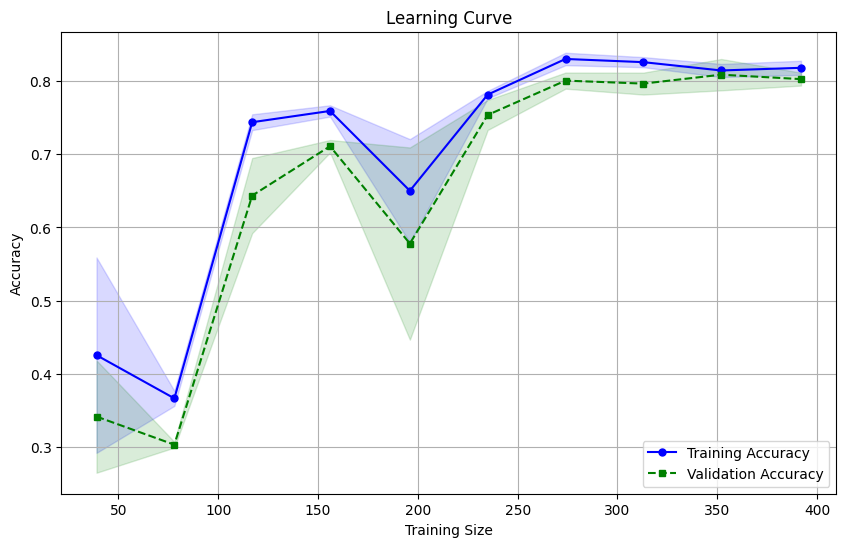

In [223]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [194]:
nb_classifier = GaussianNB()

# Fit the model
nb_classifier.fit(X_train, Y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test)

In [195]:
accuracy = accuracy_score(Y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(Y_test, y_pred))

Naive Bayes Accuracy: 0.7804878048780488
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

